In [1]:
import mlflow
import numpy as np
import seaborn
from urllib.parse import urlparse
import glob
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.model_selection

import relspecs
import diagnostics
import relspecs
import utils

seaborn.set(rc={'figure.figsize':(27,9)})
run_id = "d82f0b2befc24272aa99cc4a326ab430"
def load(prefix):
    return utils.load_npa_artifact("autoencoder_baseline",run_id,prefix=prefix)


foo 0.0005319148936170213


In [2]:
val_mae = load("mae_per_feature_val")
train_mae = load("mae_per_feature_train")


In [3]:
currencies = relspecs.get_codelists()['Currency']
print(currencies[48],currencies[51],currencies[66:69],currencies[152:155])

EUR GBP ['INR', 'IQD', 'IRR'] ['USD', 'USN', 'USS']


In [4]:
rel = relspecs.rels['budget']

(277, 211)
vmin 3.530364e-05 vmax 1.0960221


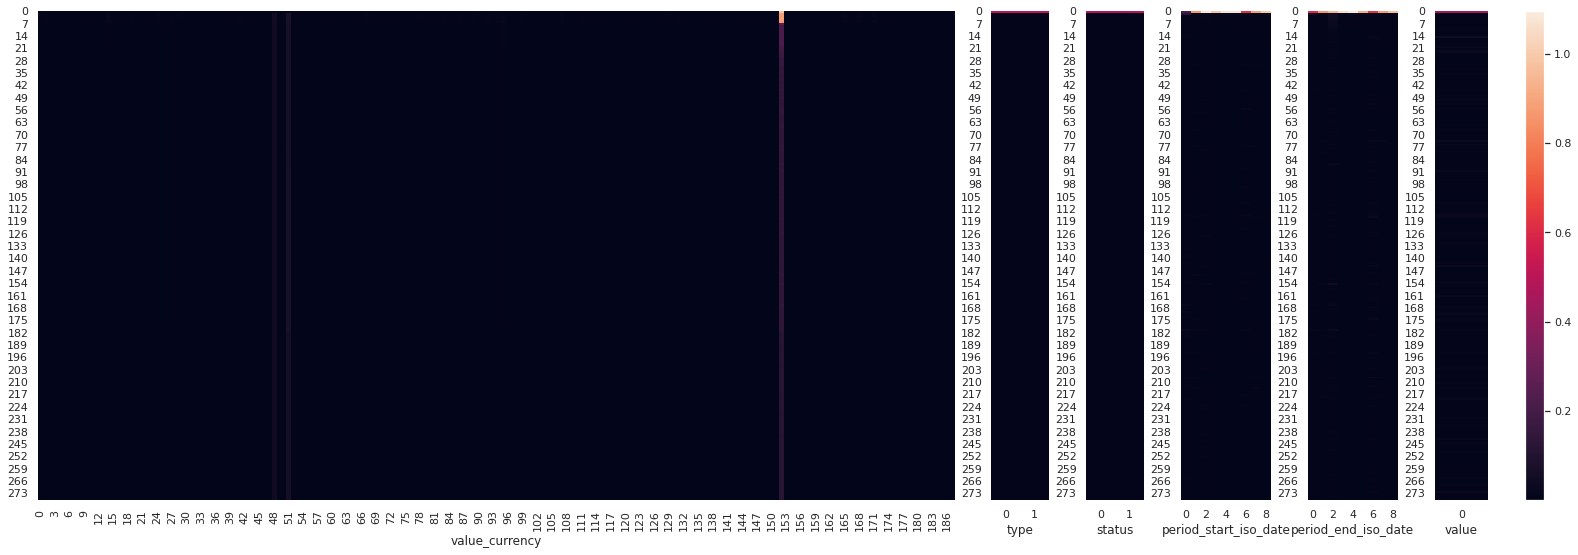

In [5]:
print(val_mae.shape)
_ = diagnostics.heatmaps(val_mae,rel,type_="fields")

vmin 3.49073e-05 vmax 0.89374614


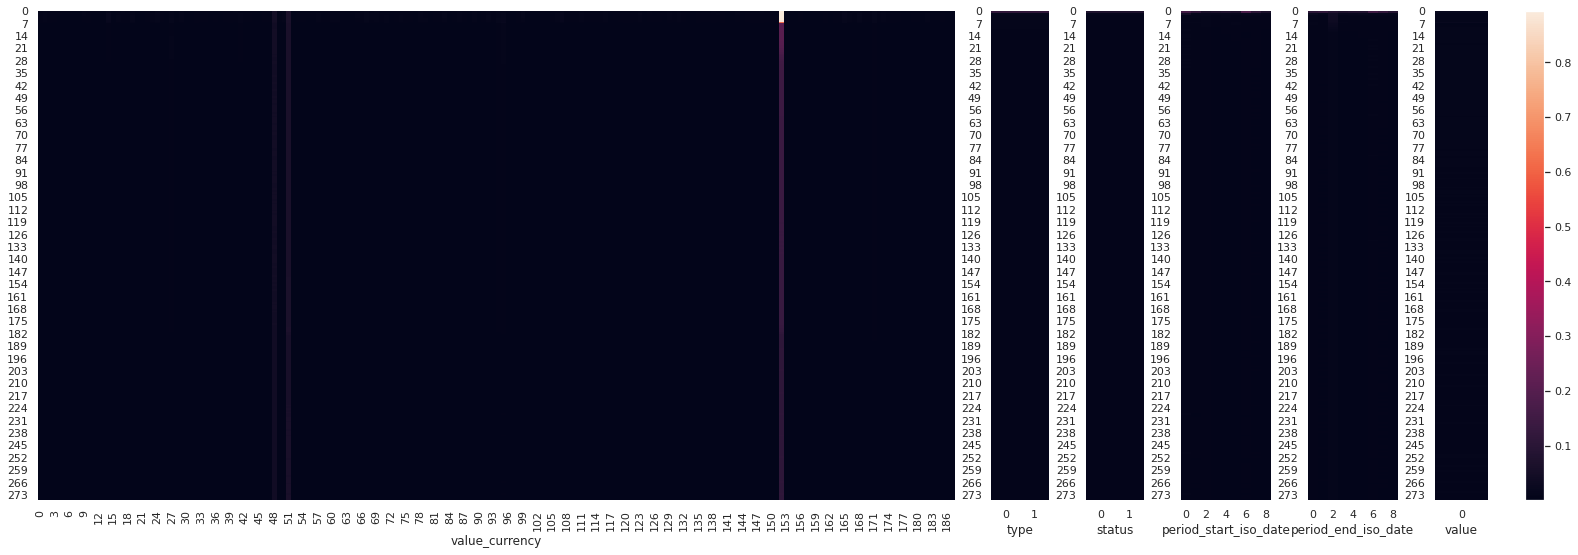

In [6]:
_ = diagnostics.heatmaps(train_mae,rel,type_="fields")

vmin -1.0002611 vmax 0.9642486
[[0.00608836 0.00370523 0.00796347 0.00524643 0.00395417]
 [0.00567198 0.00327144 0.00931275 0.00499148 0.0037661 ]
 [0.00574657 0.00332646 0.00925145 0.00507856 0.00386507]
 ...
 [0.00026433 0.00051397 0.00070256 0.06783734 0.00043667]
 [0.00026579 0.00051609 0.00070612 0.0676819  0.0004384 ]
 [0.00026491 0.00051477 0.00070465 0.06768702 0.00043686]]
maxes [171  95  51 152] maxes_vals [0.00310769 0.00348534 0.06768702 0.83630025]
ZMK
MNT
GBP
USD


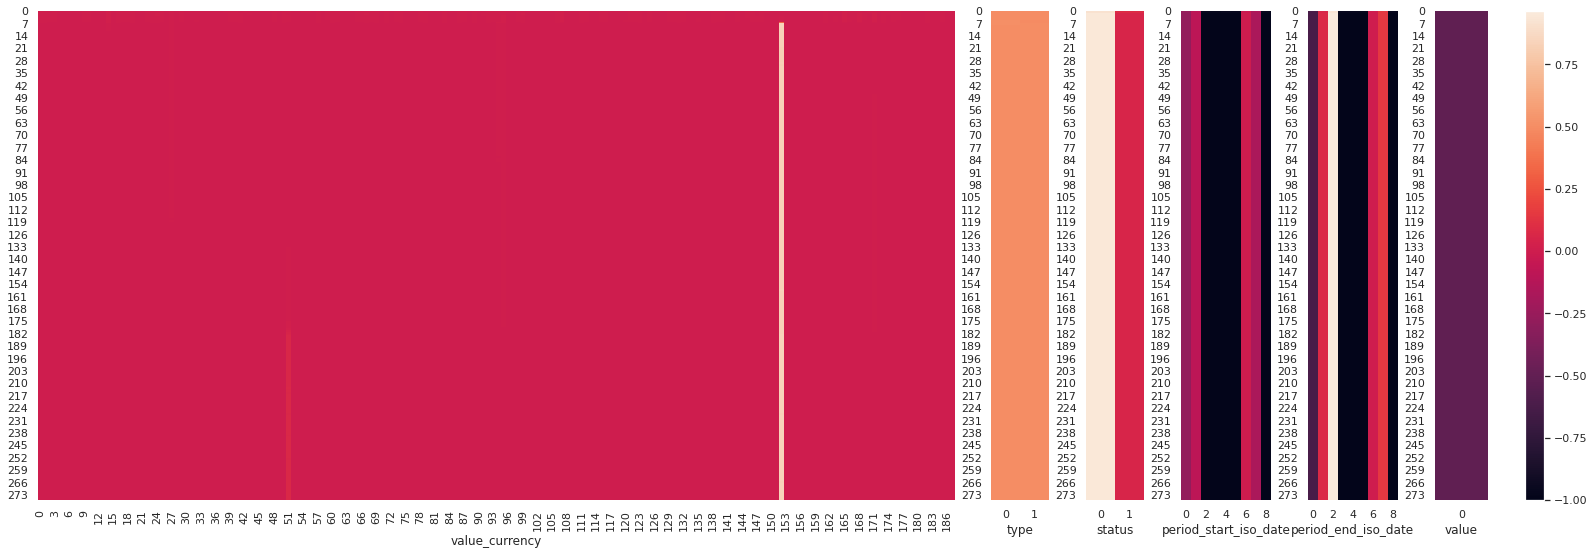

In [7]:
train_output_mean = load("output_mean_per_feature_train")
val_output_mean = load("output_mean_per_feature_val")
_ = diagnostics.heatmaps(train_output_mean,rel,type_="fields")
print(train_output_mean[:,(48,49,50,51,153)])

maxes = np.argsort(train_output_mean[-1,:188])[-4:]
maxes_vals = train_output_mean[-1,maxes]
print("maxes",maxes,"maxes_vals",maxes_vals)
for i in maxes:
    print(relspecs.rels['budget'].fields[0].codelist[i])
    

vmin -1.0002611 vmax 0.9642486


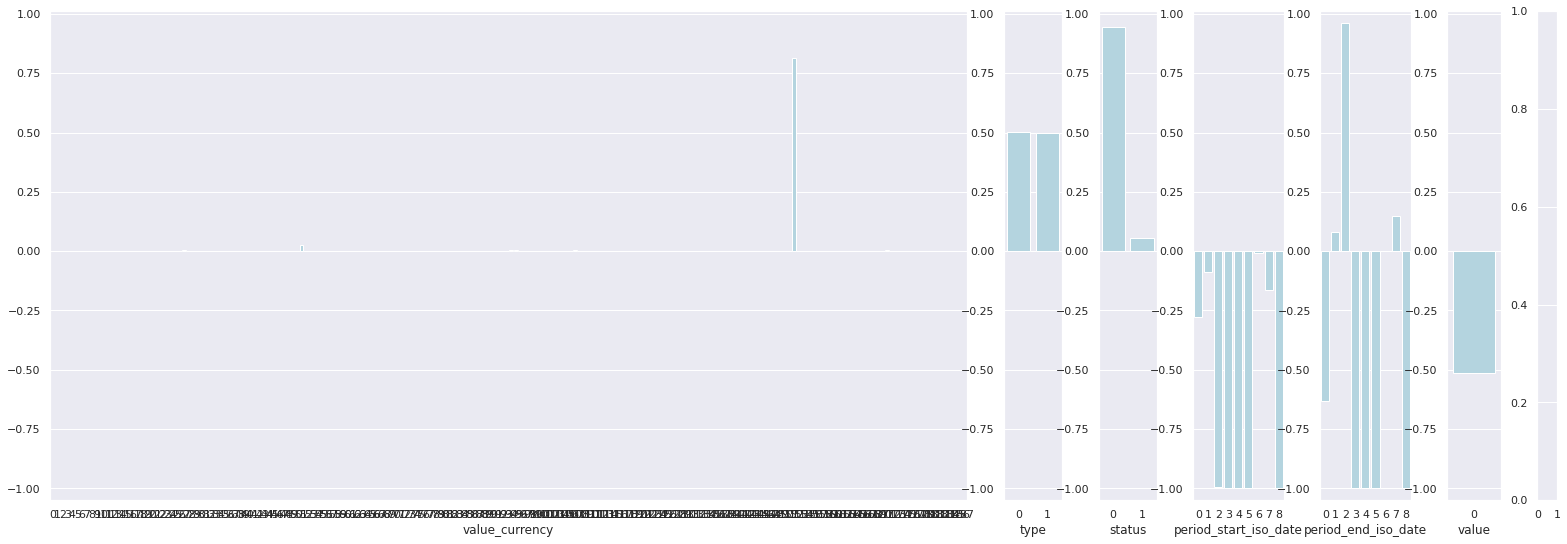

In [8]:
_ = diagnostics.barplots(train_output_mean,rel,type_="fields")


vmin -1.010781 vmax 1.0036343


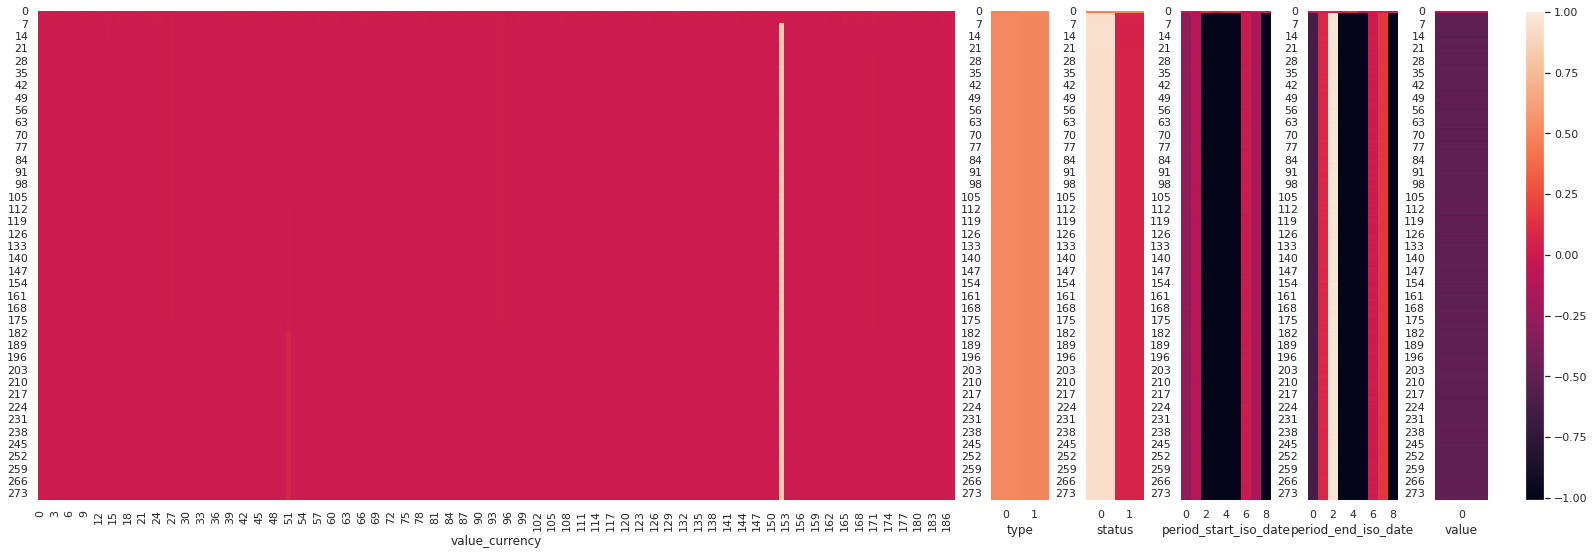

In [9]:
_ = diagnostics.heatmaps(val_output_mean,rel,type_="fields")

vmin 2.5744253e-09 vmax 0.44715795


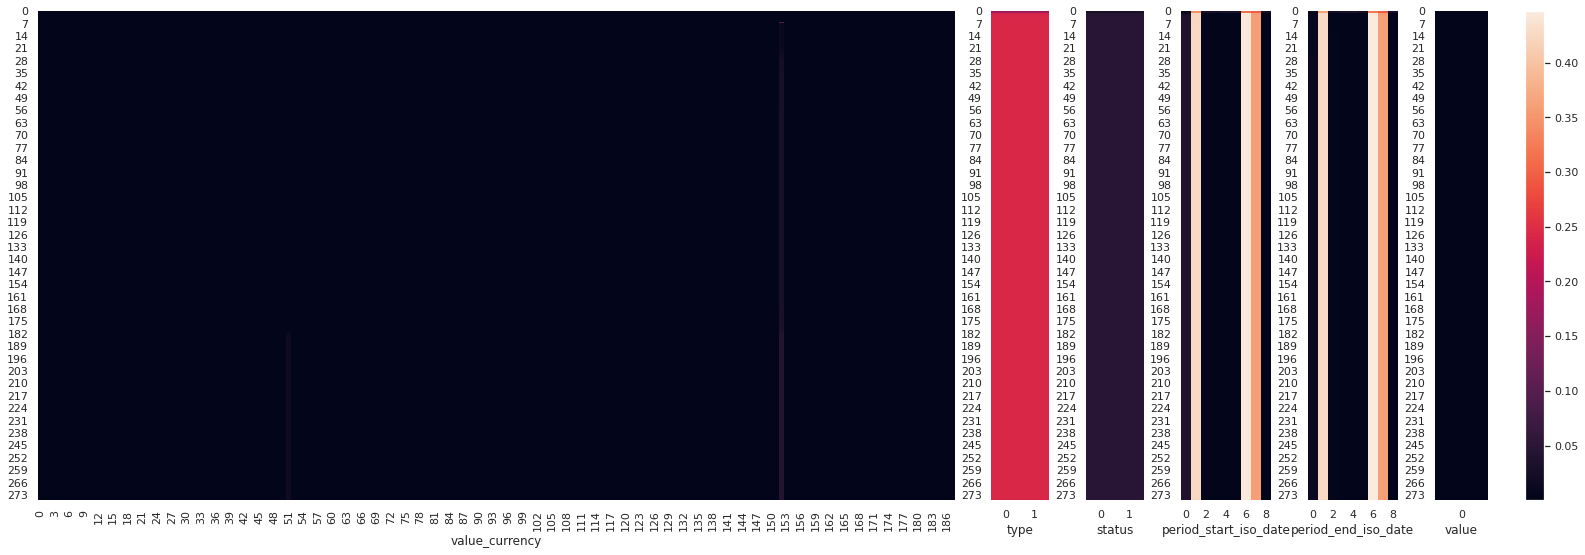

In [10]:
train_output_var = load("output_var_per_feature_train")
val_output_var = load("output_var_per_feature_val")
_ = diagnostics.heatmaps(train_output_var,rel,type_="fields")

vmin 2.136836e-10 vmax 0.45023376


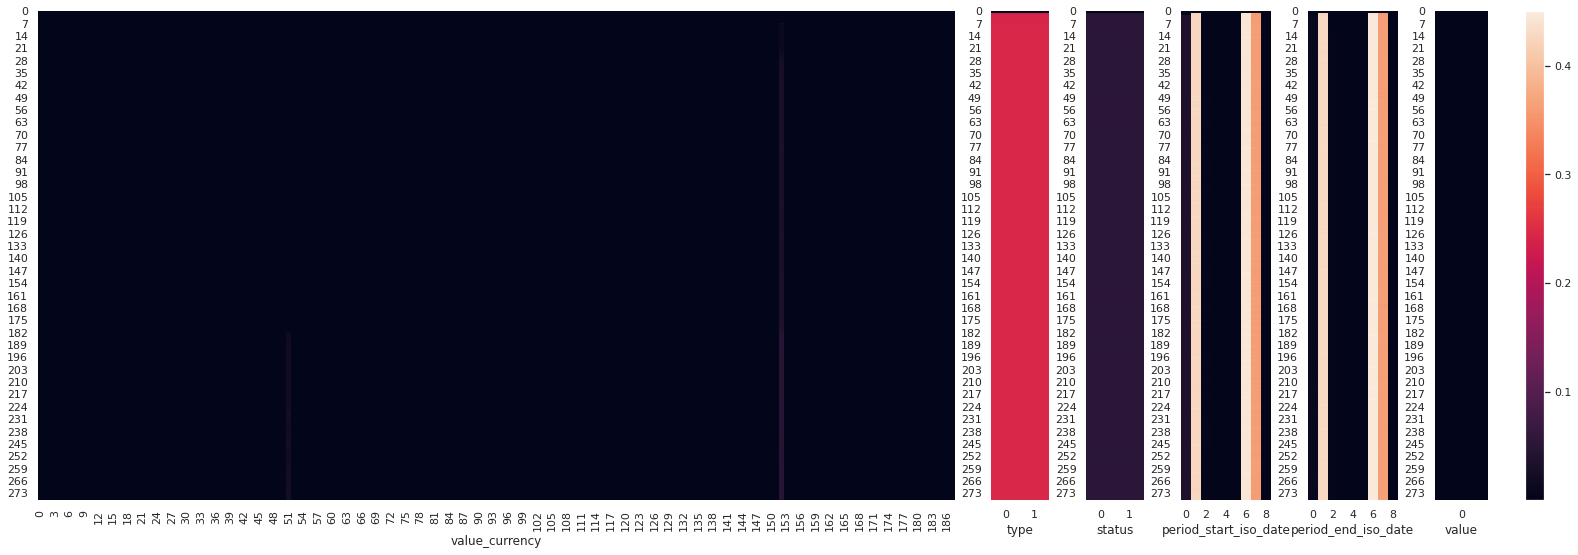

In [11]:
_ = diagnostics.heatmaps(val_output_var,rel,type_="fields")

vmin -1.0 vmax 1.0000001
vmin -1.0 vmax 1.0000001
(367044, 211)
152


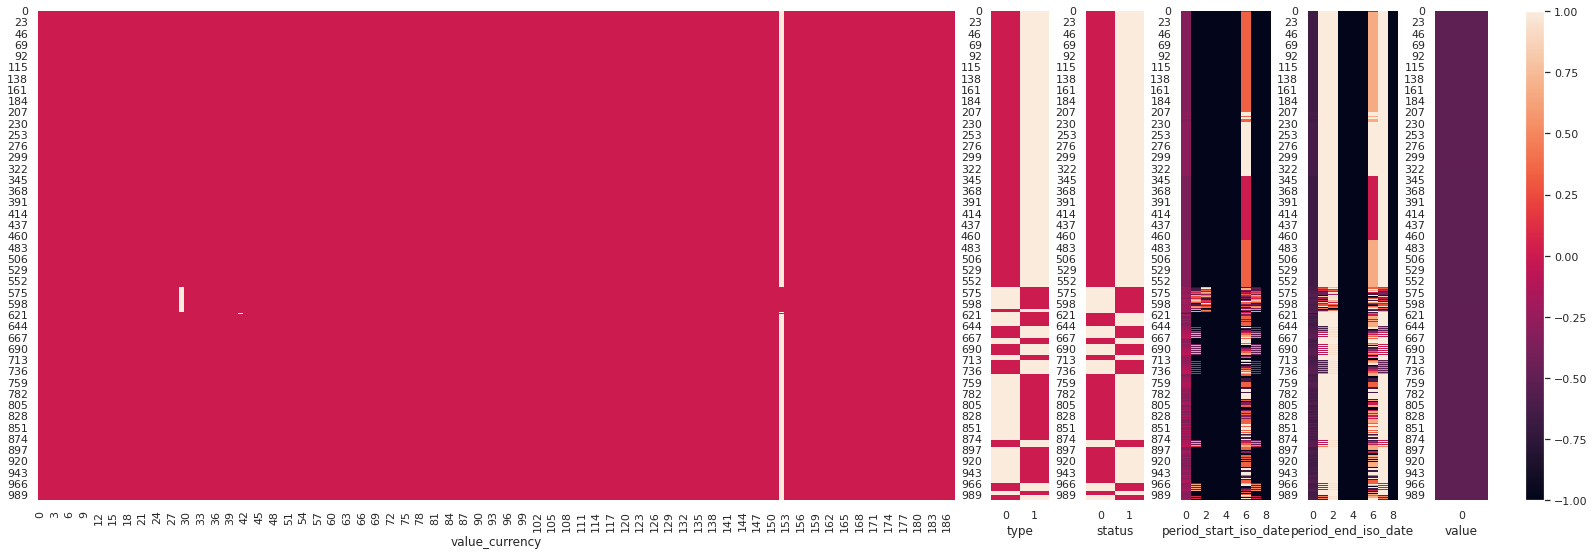

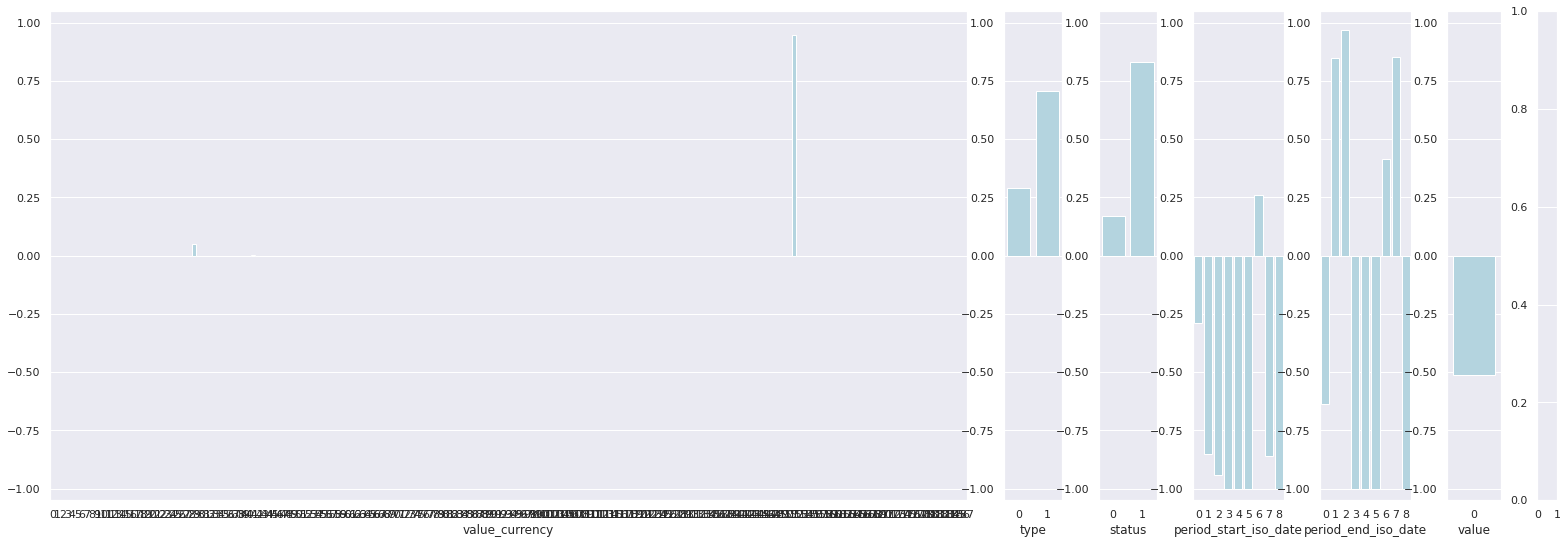

In [12]:
train_ds, test_ds = utils.load_tsets('budget',with_set_index=False)
train_ds_scaled, test_ds_scaled = rel.make_and_fit_scalers(train_ds,test_ds)
#section_orig = train_ds[550:650,27:36]
#section = train_ds_scaled[550:650,27:36]
section = train_ds_scaled[:1000,:]
_ = diagnostics.heatmaps(section,rel,type_="fields")
_ = diagnostics.barplots(section,rel,type_="fields")

import importlib
importlib.reload(utils)
utils.set_np_printoptions()
print(train_ds_scaled.shape)
#print(section_orig)
#print(section)
#print(np.vstack([list(range(train_ds.shape[1])),np.max(train_ds,axis=0)]).T)
print(np.argmax(train_ds_scaled[0,:188]))

vmin -1.0 vmax 0.96417665
maxes [[ 41  48  51 152]] maxes_vals [[[0.00179 0.0417 0.0597 0.897]]]
foo 0.0005319148936170213
DKK
EUR
GBP
USD


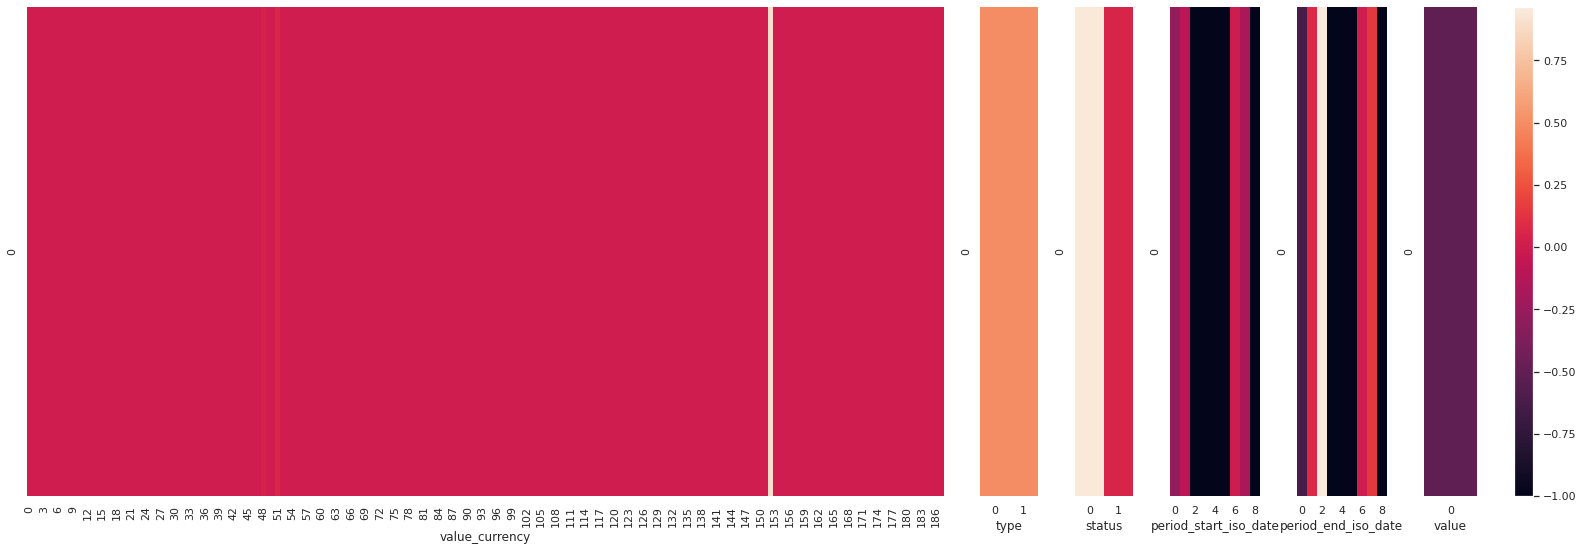

In [13]:
mean_train_ds_scaled = np.array([np.mean(train_ds_scaled,axis=0)])
_ = diagnostics.heatmaps(mean_train_ds_scaled,rel,type_="fields")
maxes = np.argsort(mean_train_ds_scaled[:,:188])[:,-4:]
maxes_vals = mean_train_ds_scaled[:,maxes]
print("maxes",maxes,"maxes_vals",maxes_vals)
importlib.reload(relspecs)
for i in maxes[0]:
    print(relspecs.rels['budget'].fields[0].codelist[i])

In [14]:
relspecs.rels['budget'].fields[0].codelist_name
len(relspecs.get_codelists()['Currency'])
188+2+2+9+9+1,rel.fields_names

(211,
 ['value_currency',
  'type',
  'status',
  'period_start_iso_date',
  'period_end_iso_date',
  'value'])

In [15]:
import persistency
db = persistency.mongo_db()
print([x['name'] for x in db.list_collections()])

['npas_tsets', 'budget', 'result', 'npas', 'budget_arrayfied', 'budget_encoded', 'codelists']


In [16]:
for k,v in db['budget_encoded'].find_one()['set_'].items():
    print(k)
    print(np.array(v).shape,np.array(v))
import utils
import pymongo
document = db['budget_arrayfied'].find().sort('_id', pymongo.DESCENDING).limit(1)[0]
npa = utils.deserialize(document['npa'])
print("npa.shape",npa.shape)

type
(1, 2) [[0 1]]
status
(1, 2) [[0 1]]
period_start_iso_date
(1, 9) [[2017    1    1    0    0    0    6    1   -1]]
period_end_iso_date
(1, 9) [[2017   12   31    0    0    0    6  365   -1]]
value_currency
(1, 188) [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
value
(1,) [7.31e+05]
npa.shape (1, 211)


In [17]:
train_dataset,test_dataset = utils.load_tsets(rel.name)
print("train_dataset.shape",train_dataset.shape)
import torch
t = torch.Tensor(train_dataset[0:1000,0:188])
import relspecs
currencies = relspecs.get_codelists()['Currency']
am = t.argmax(1)
#print(am)

train_dataset.shape (367044, 211)


vmin 4.3335793e-05 vmax 0.8510144


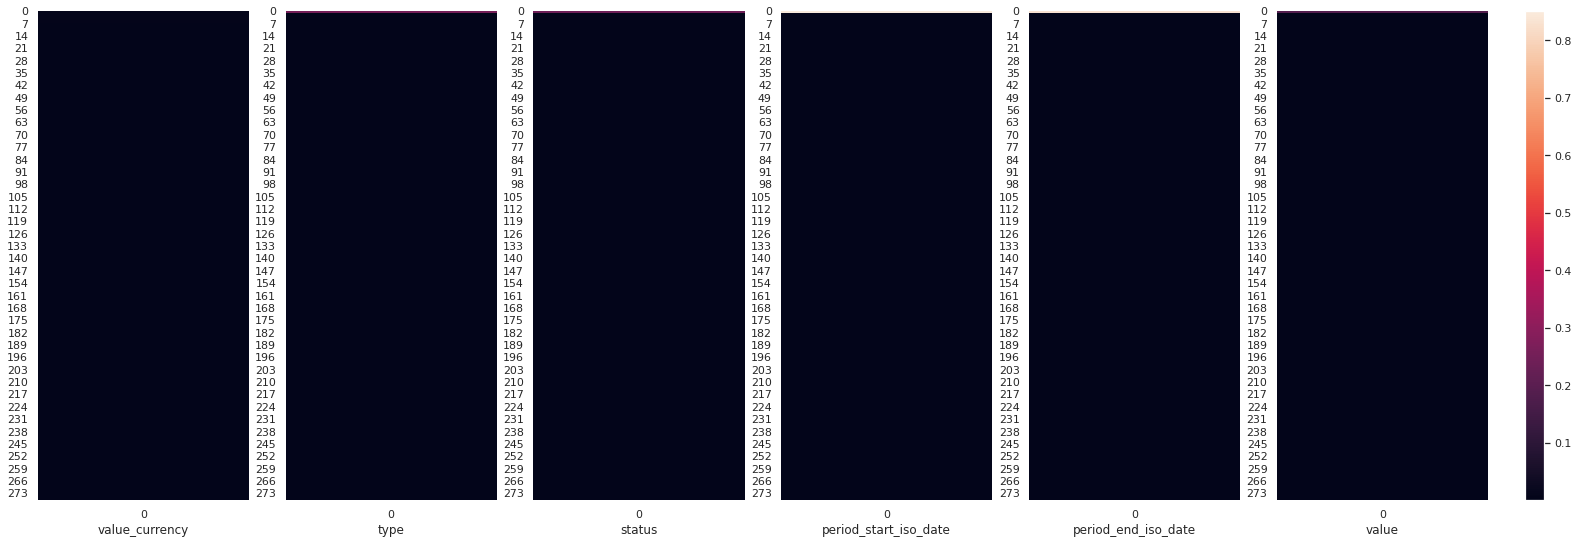

In [18]:
mean_losses_val = load("mean_losses_val")
importlib.reload(diagnostics)
_ = diagnostics.heatmaps(mean_losses_val, rel,type_="losses")

In [19]:
output_last_epoch_train = load("output_last_epoch_train")
print(np.argmax(output_last_epoch_train[0,:]))
_ = diagnostics.heatmaps(output_last_epoch_train, rel,type_="fields")
_ = diagnostics.barplots(output_last_epoch_train,rel,type_="fields")

IndexError: list index out of range

In [20]:
output_last_epoch_val = load("output_last_epoch_train")
_ = diagnostics.heatmaps(output_last_epoch_val, rel,type_="fields")


IndexError: list index out of range

vmin 0.0 vmax 0.9998961877516804


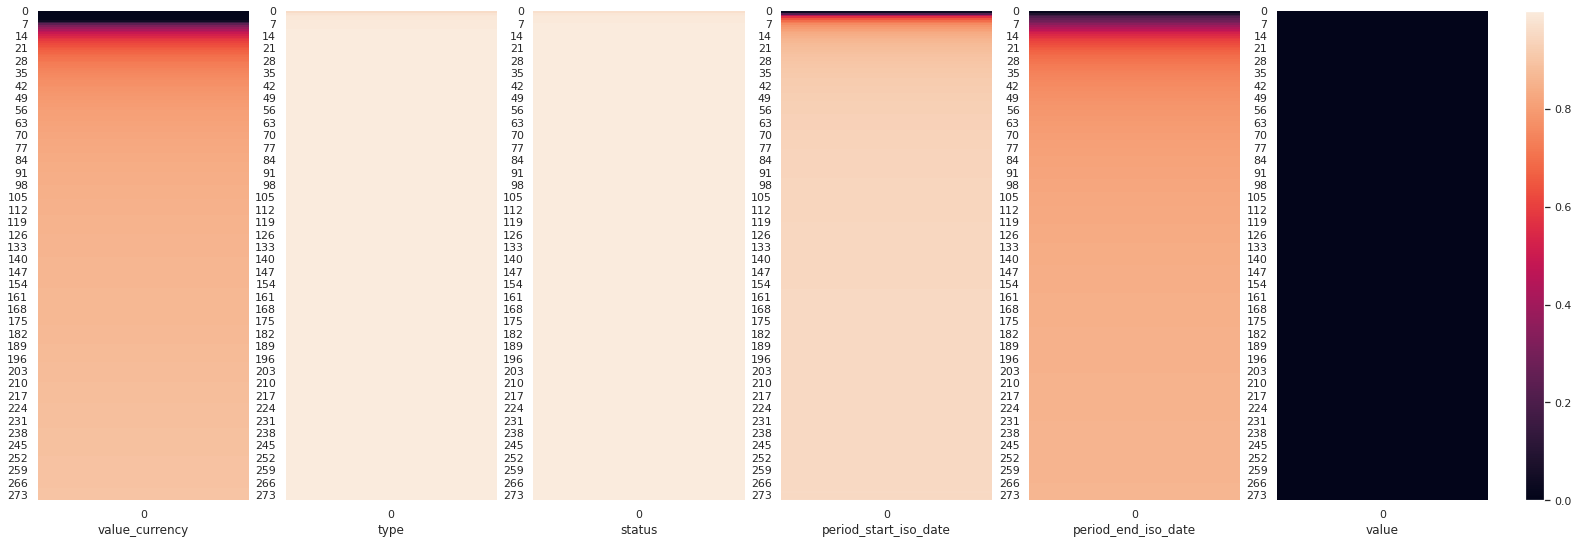

In [21]:
mean_guess_correct_train = load("mean_guess_correct_train")
_ = diagnostics.heatmaps(mean_guess_correct_train, rel,type_="losses")

vmin 0.0 vmax 0.9999837893584086


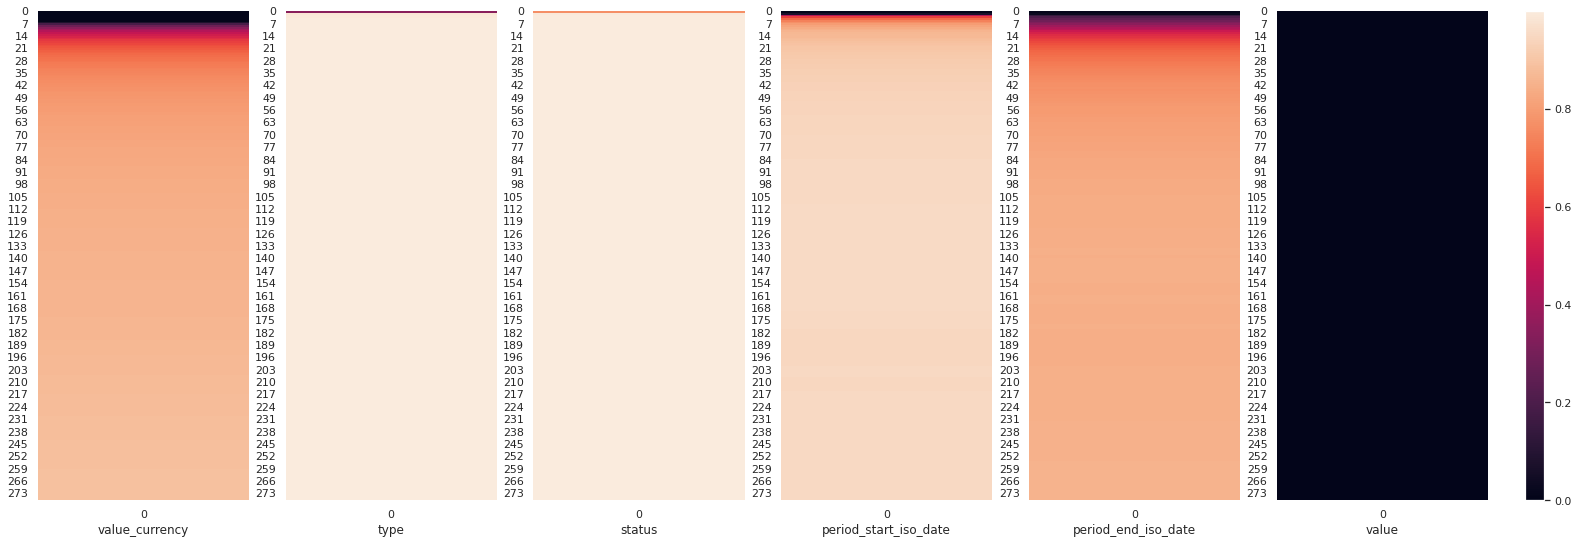

In [22]:
mean_guess_correct_val = load("mean_guess_correct_val")
_ = diagnostics.heatmaps(mean_guess_correct_val, rel,type_="losses")

In [23]:
importlib.reload(diagnostics)
seaborn.set(rc={'figure.figsize':(100,100)})
diagnostics.correlation_heatmap(train_ds)

TypeError: correlation_heatmap() missing 3 required positional arguments: 'corr_metric', 'mask', and 'epoch_nr'

In [24]:
from IPython.display import Image, display
from ipywidgets import interact, interact_manual

importlib.reload(utils)
corr_filenames = utils.glob_artifacts(run_id,prefix="correlation_heatmap_latent_train")
@interact
def plot(curr=corr_filenames):
    print(curr)
    display(Image(curr))
    #diagnostics.correlation_heatmap(latent_train)

interactive(children=(Dropdown(description='curr', options=('/home/frablum/PycharmProjects/learning_sets/mlrun…